In [13]:
from numbers import Number
from utils import normalize, split_dataset
from data_extractor import Data_extractor_v1
import pandas as pd
import numpy as np

In [14]:

path = "/data/hnl/prompt_tau/anatuple/nanoV10/TEST6/ttm_DeepTau2p5/"
extractor = Data_extractor_v1('ttm')
data = extractor(path)

In [15]:
data.keys()

dict_keys(['event', 'genWeight', 'deltaR_12', 'deltaR_13', 'deltaR_23', 'pt_123', 'mt_12', 'mt_13', 'mt_23', 'Mt_tot', 'n_tauh', 'mass_hyp', 'signal_label', 'channel', 'event_type'])

In [16]:
data_pd = pd.DataFrame(data)
signal = data_pd.loc[data_pd['signal_label']==1]
background = data_pd.loc[data_pd['signal_label']==0]
background_0 = background.loc[background['n_tauh']==0]
background_1 = background.loc[background['n_tauh']==1]
background_2 = background.loc[background['n_tauh']==2]

In [90]:
# variables_label = [r"$\Delta R_{\mu\tau_1}$", r"$\Delta R_{\mu\tau_2}$", r"$\sum_{i\in \{\mu,\tau_1,\tau_2\}}\vec{p}_{T}^{i}$", r"$m_{T}^{\tau\tau}$", r"$M_{T}^{total}$"]
input_vars = ['deltaR_12', 'deltaR_13', 'deltaR_23', 'pt_123', 'mt_12', 'mt_13', 'mt_23', 'Mt_tot', 'n_tauh', 'signal_label', 'mass_hyp']
variables_label = [r"$\Delta R_{\tau_1\tau_2}$", r"$\Delta R_{\tau_1\mu}$", r"$\Delta R_{\tau_2\mu}$", r"$p_{T}^{\sum_{\mu\tau\tau}}$ [GeV/c]", r"$m_{T}^{\tau\tau}$", r"$m_{T}^{\tau_1\mu}$", r"$m_{T}^{\tau_2\mu}$", r"$M_{T}^{total}$"]



In [67]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({"font.size": 16, "font.family": "serif"})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [86]:
def plot_hist(dataframe, keys, keys_label, bins_list, normalize = True, mode='n_tauh'):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    if type(dataframe) == dict:
        data_pd = pd.DataFrame(dataframe)
    else:
        data_pd = dataframe.copy()

    sub_df = {}
    if mode == 'n_tauh':
        sub_df_keys =  ["signal", "bkg_0", "bkg_1", "bkg_2"]
        event_type_labels = ["signal", r"$background\ 0\times\tau_h$", r"$background\ 1\times\tau_h$", r"$background\ 2\times\tau_h$"]
        signal = data_pd.loc[data_pd['signal_label']==1]
        background = data_pd.loc[data_pd['signal_label']==0]
        background_0 = background.loc[background['n_tauh']==0]
        background_1 = background.loc[background['n_tauh']==1]
        background_2 = background.loc[background['n_tauh']==2]
        sub_df[sub_df_keys[0]] = signal
        sub_df[sub_df_keys[1]] = background_0
        sub_df[sub_df_keys[2]] = background_1
        sub_df[sub_df_keys[3]] = background_2
    else:
        raise ValueError("The mode {mode} is not valid")
    
    figs = []

    if type(keys) != list:
        keys = [keys]
        keys_label = [keys_label]
        bins_list = [bins_list]
    
    for i,key in enumerate(keys):
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        counts = []
        errors = []
        for j,event_type in enumerate(sub_df.keys()):
            df = sub_df[event_type]
            c,b = np.histogram(df[key], bins=bins_list[i], weights=df['genWeight'])
            c2,_ = np.histogram(df[key], bins=bins_list[i], weights=df['genWeight']**2)
            if normalize:
                norm = np.linalg.norm(c)
                c /= norm
                c2 /= norm**2
            
            ax.stairs(c, b, label=event_type_labels[j], linewidth=2)
            # ax.errorbar((b[1:]+b[:-1])/2, c, yerr = np.sqrt(c2), marker = '.',drawstyle = 'steps-mid', color=colors[j])
            ax.errorbar((b[1:]+b[:-1])/2, c, yerr = np.sqrt(c2),fmt='.', color='k', linewidth=1)
            ax.set_xlabel(keys_label[i])
            ax.legend()
            ax.grid(True)
        figs.append(fig)
    return figs
        
        

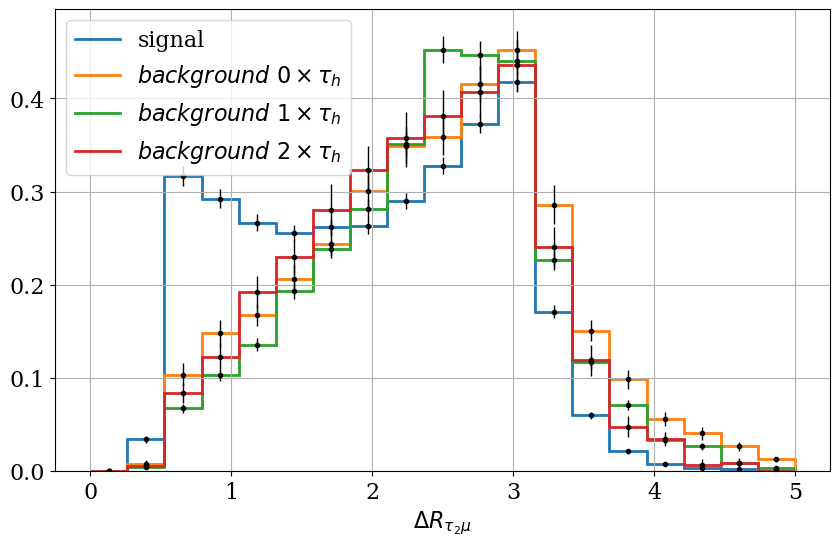

In [100]:
bin_edges = np.linspace(0,5,20)
fig = plot_hist(data_pd, input_vars[2], variables_label[2], bin_edges)[0]
fig.savefig("Images/TEST6_ttm_DeepTau2p5_ntauh_deltaR23.pdf")

In [9]:
i=0
weights = signal['genWeight']
counts_s = np.histogram(signal[input_vars[i]], bins=bin_edges[i], weights = weights)
h2,_ = np.histogram(signal[input_vars[i]], bins=bin_edges[i], weights = weights**2)
error = np.sqrt(h2)

In [11]:
dictionary ={'a':[1,2,3,4], 'b':[2,3,4,5], 'c':[3,4,5,6]}
df = pd.DataFrame(dictionary)
for row in df.iterrows():
    

SyntaxError: unexpected EOF while parsing (2057471626.py, line 4)

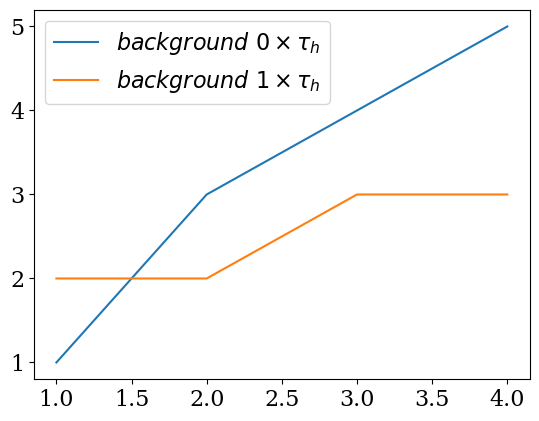

In [74]:
plt.plot([1,2,3,4],[1,3,4,5], label = r"$background\ 0\times\tau_h$")
plt.plot([1,2,3,4],[2,2,3,3], label = r"$background\ 1\times\tau_h$")
plt.legend()
